<a href="https://colab.research.google.com/github/JonasSouza871/Machine-Learning-Statistics-Studies/blob/main/Tipos_de_Regress%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Modelo Regressão Linear

------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Pré processamento de dados:

In [11]:
dados = pd.read_csv('Dataset_temperatura_umidade.csv') #dados coletados atraves do dataseet no kaggle para temperatura e umidade
#link: https://www.kaggle.com/datasets/jonassouza872/temperature-vitria-da-conquista-08-25-to-08-29/code
#feito pelo proprio autor
dados

,Timestamp,Temp_AHT20_C,Umid_AHT20_pct
0,2025-08-25 22:11:31,22.85,69.97
1,2025-08-25 22:11:37,22.82,69.05
2,2025-08-25 22:11:43,22.82,68.84
3,2025-08-25 22:11:49,22.85,69.00
4,2025-08-25 22:11:55,22.83,68.89
...,...,...,...
51100,2025-08-29 11:46:43,24.01,58.70
51101,2025-08-29 11:46:49,24.00,58.69
51102,2025-08-29 11:46:55,23.93,56.39
51103,2025-08-29 11:47:01,23.94,56.71


In [15]:
df = pd.DataFrame(dados) #Transforma em dataframe
df

,Timestamp,Temp_AHT20_C,Umid_AHT20_pct
0,2025-08-25 22:11:31,22.85,69.97
1,2025-08-25 22:11:37,22.82,69.05
2,2025-08-25 22:11:43,22.82,68.84
3,2025-08-25 22:11:49,22.85,69.00
4,2025-08-25 22:11:55,22.83,68.89
...,...,...,...
51100,2025-08-29 11:46:43,24.01,58.70
51101,2025-08-29 11:46:49,24.00,58.69
51102,2025-08-29 11:46:55,23.93,56.39
51103,2025-08-29 11:47:01,23.94,56.71


In [20]:
df['Temp_AHT20_C'].describe()

,Temp_AHT20_C
count,51105.000000
mean,20.034183
std,2.816140
min,15.080000
25%,17.520000
50%,19.280000
75%,22.510000
max,25.940000


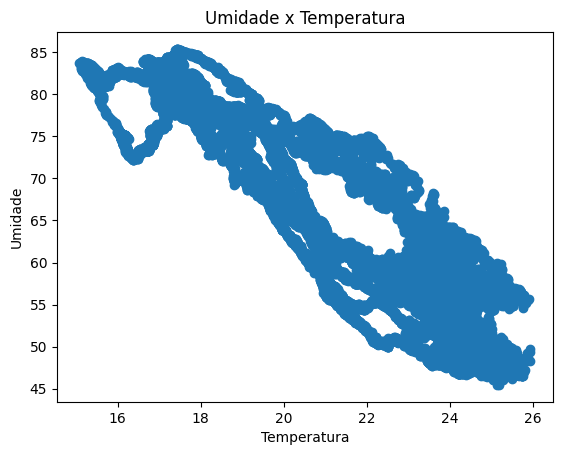

In [22]:
plt.scatter(df['Temp_AHT20_C'], df['Umid_AHT20_pct']) #plota temperatura e umidade
plt.title('Umidade x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.show()

-  como são varios dados de temperatura >50000 por isso que fica estranho os dados.

In [28]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

regressao = smf.ols(formula = 'Umid_AHT20_pct ~ Temp_AHT20_C', data = df).fit()
#variavel Umidade sendo Y e temperatura sendo x
# y = ax
# mostrando que a umidade é dependente da temperatura
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:         Umid_AHT20_pct   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.667e+05
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:34:15   Log-Likelihood:            -1.4956e+05
No. Observations:               51105   AIC:                         2.991e+05
Df Residuals:                   51103   BIC:                         2.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      143.3316      0.144    998.691   

In [29]:
regressao.params

,0
Intercept,143.331585
Temp_AHT20_C,-3.663688


- Interceptor considerando que em 0 graus a umidade esperada é de 143%, o que nao faz sentido logico visto que o maximo é 100%. Mostrando assim que o mdoelo so funciona na faixa esperada.

f(x) = ax +b

f(x) = -3.66*x +143.33

In [41]:
x = 18 # temperatura de 18 graus.
y = -3.66*x +143.33
print(y) # 77% de umidade previsto

77.45000000000002


- tambem temos o valor de r^2 de 0.839 temos que a temperatura explica 83,9% dos dados de umidade

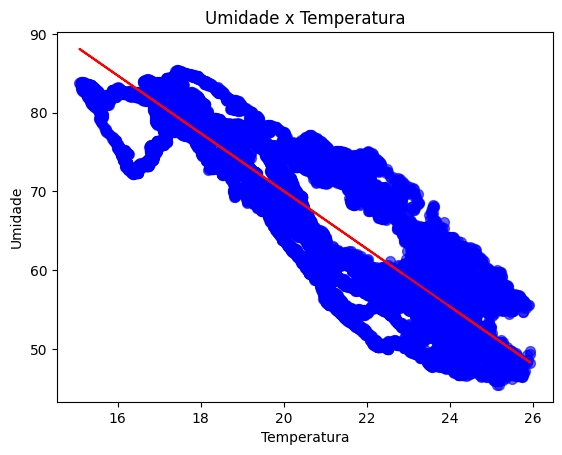

In [42]:
plt.scatter(df['Temp_AHT20_C'], df['Umid_AHT20_pct'], s = 50, color= 'blue', alpha = 0.6)
plt.plot(df['Temp_AHT20_C'], regressao.fittedvalues, color = 'red')
plt.title('Umidade x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.show()

- por mais que o modelo tenha representado bom valores de r^2 ainda sim ficou mio estranho o fato de se a temperatura der igual a 0 a umidade ser 143% o que não é possivel.

- As melhores predições do modelo será na faixa que foi exposto (entre 16°c e 26°c)